# Optimistic initial values

Optimistic intial values method is a simple modification to the purely greedy algorithm. To use optimistic initial values, we do not require any epsilon value or random exploration.

Recall from the [previous bandit examples](ab-testing.html#notation) that, we update our current estimate of the reward (Q value) based on the previous estimate. The initial values of these reward estimates are set to be 0 (see code from [ab-testing](ab-testing.ipynb)). The optimistic values method on the other hand initializes these initial estimates to be a very large value. In this way, we overestimate the mean estimate.

Once the estimates are initialized, we do not perform any exploration of any kind, we just choose the bandit with the highest estimate of reward (Q) at the time step.

No. of times optimal bandit was pulled 9925
Q values [0.40167238 0.38461538 0.38461538 0.38461538]


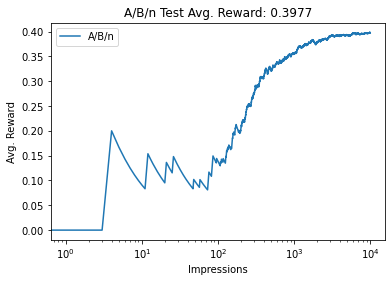

In [16]:
# Optimistic initial values in code

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class BernoulliBandit(object):
    def __init__(self, p):
        self.p = p
    
    def display_ad(self):
        reward = np.random.binomial(n=1, p=self.p)
        return reward
    
bandit_probs = [0.4, 0.016, 0.02, 0.028, 0.031] #These probabilities represent the reward distribution per each bandit (ad here).

ads = [BernoulliBandit(i) for i in bandit_probs]

n_trails = 10000
n_ads = len(ads)

n_optimal_pulls = 0
Q = np.array([10., 10., 10., 10.])  # Intializing bandit probs to a very high value
N = np.ones(n_ads)  # N, total impressions
total_reward = 0
avg_rewards = []  # Save average rewards over time

for i in range(n_trails):
    ad_chosen = np.argmax(Q)

    if ad_chosen == np.argmax(bandit_probs):
            n_optimal_pulls +=1

    R = ads[ad_chosen].display_ad()  # Observe reward
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_reward_so_far)

best_ad_index = np.argmax(Q)  # Find the best action
print("No. of times optimal bandit was pulled", n_optimal_pulls)
print("Q values", Q)


df_reward_comparison = pd.DataFrame(avg_rewards, columns=['A/B/n'])
df_reward_comparison['A/B/n'].plot(title="A/B/n Test Avg. Reward: {:.4f}"
                                .format(avg_reward_so_far))
plt.xlabel("Impressions")
plt.ylabel("Avg. Reward")
plt.xscale('log')
plt.legend()
plt.show()

One important thing to notice from the above results is that, **not all the estimates converge to their actual values**. This happens when the estimated value of a bandit is lower than the actual true estimate of another bandit. This is due to the fact that we perform greedy action at every step and the bandits with lower probability estimates are not chosen at all.

Optimistic initial values inherently allows exploration to happen by initializing return estimates of each bandit to a large value.

$$
\text{Value of optimistic value} \propto \text{exploration}$$

**As a matter of fact, the estimated value for the optimal bandit might not even converge as there is a chance that the initial value can be very high while the number of steps can be very low to allow the model to converge. This is a disadvantage of Optimistic initial values method.**